In [1]:
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
import sqlite3 as sl
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely import wkt
from datetime import datetime
import time

from bing_helper import Bing

from dotenv import load_dotenv

load_dotenv()

True

In [3]:
import itertools
import numpy as np

DROOT = '../1-data/'
KEY = os.environ['BING_API_KEY']
cities = pd.read_excel(os.path.join(DROOT, '1-research', 'cities.xlsx'), index_col=0)
cities.head(5)

CACHE_PATH = 'tmp.db'
KEY = os.environ['BING_API_KEY']
client = Bing(KEY, os.path.join(DROOT, '3-interim', 'bing_cache.db'))

wew = pd.read_sql_query("SELECT * FROM isochrone WHERE uid='2851-91-driving-5m-v0';", client.con)
# wew = gpd.GeoDataFrame(wew, crs="EPSG:4326")
# wew.geometry.dtype

In [4]:
for i, city in cities.iterrows():
    file = f'{city.ID_HDC_G0}.pcl'
    df = pd.read_pickle(os.path.join(DROOT, '3-interim', 'populationmasks', file))
    gdf = gpd.GeoDataFrame(df)
    
    origins  = enumerate(gdf.centroid.to_crs("EPSG:4326"))
    times    = range(5, 55, 10)
    modes_dt = [('driving', 'driving-peak', datetime(2023, 5, 2, 8, 30, 37)), 
                ('driving', 'driving',      datetime(2023, 5, 2, 13, 0, 37)), 
#                 ('transit', 'transit-peak', datetime(2023, 5, 2, 8, 30, 37)),
#                 ('transit', 'transit',      datetime(2023, 5, 2, 13, 0, 37)), 
#                 ('walking', 'walking',      datetime(2023, 5, 2, 8, 30, 37))
               ]
    
    batch      = list(itertools.product(origins, times, modes_dt))
    isochrones = client.get_isochrones_async(city.ID_HDC_G0, batch)
    
isochrones

KeyboardInterrupt: 

In [ ]:
    for pid, point in tqdm(enumerate(origins), total=len(origins)):
        for i, t in enumerate(range(5, 55, 10)):
            uid = f'{city.ID_HDC_G0}-{pid}-driving-peak-{t}m-v0'
            client.get_isochrone(point, uid, t, STARTDATE, 'driving')

/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/array.py:938: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/array.py:939: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/array.py:940: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/Users/ivo/opt/anaconda3/envs/DUTTv2/lib/python3.11/site-packages/geopandas/array.py:941: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: NaN or None values are not allowed.

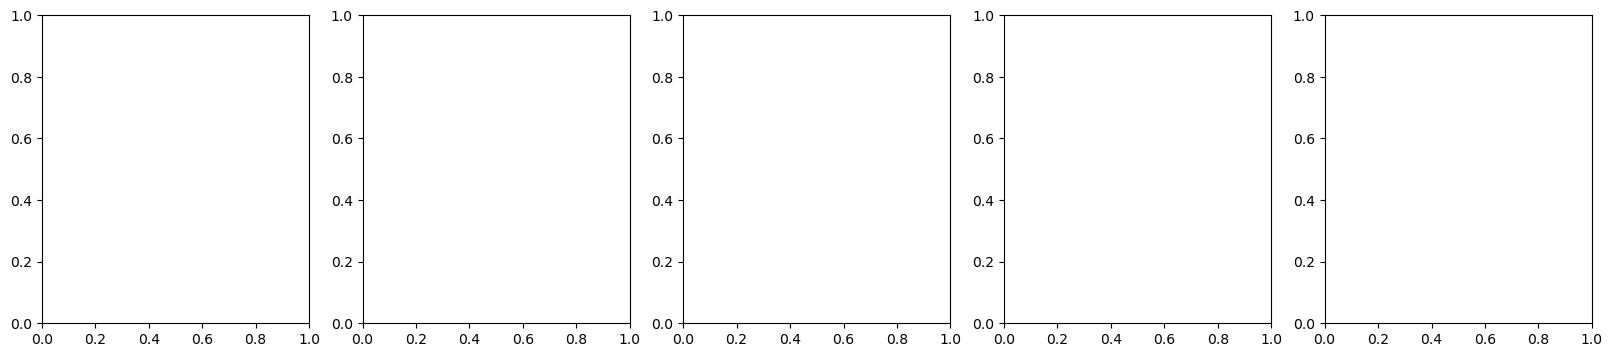

In [3]:
STARTDATE = datetime(2023, 5, 2, 16, 0, 37)
STADSHUSET = Point(18.0547751, 59.327560)
CACHE_PATH = 'tmp.db'
KEY = os.environ['BING_API_KEY']

client = Bing(KEY, CACHE_PATH)

fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
for i, t in enumerate(range(5, 55, 10)):
    stockholm = client.get_isochrone(STADSHUSET, f'trial-{t}', t, STARTDATE, 'transit', buf_m=50)
    stockholm.plot(ax=axs[i])